# Connecting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/'
lisbonDreamsData = pd.read_csv(path + 'Data/lisbonDreams.csv')

Mounted at /content/drive


#Data Understanding

In [ ]:
lisbonDreamsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          19651 non-null  int64  
 1   id                  19651 non-null  int64  
 2   start_date          19651 non-null  object 
 3   response_time       17835 non-null  object 
 4   response_rate       17835 non-null  float64
 5   acceptance_rate     18296 non-null  float64
 6   awards              19644 non-null  object 
 7   chain_hotels        19651 non-null  int64  
 8   photos              19651 non-null  object 
 9   verified            19651 non-null  object 
 10  neighbourhood       19651 non-null  object 
 11  accommodation_type  19651 non-null  object 
 12  accommodates        19651 non-null  int64  
 13  bedrooms            18757 non-null  float64
 14  price               19651 non-null  float64
 15  number_of_reviews   19651 non-null  int64  
 16  firs

# Data Preparation

In [ ]:
#Using the method 'describe' to get descriptive measures of our variables - numerical and categorical
#First check numerical variables
lisbonDreamsData.describe()

,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19651.000000,19651.000000,17835.000000,18296.000000,19651.000000,19651.000000,18757.000000,19651.000000,19651.000000,17717.000000,17674.000000,17674.000000,17674.000000
mean,9825.000000,9825.000000,95.414466,91.874399,50.729327,3.994199,1.752093,145.678641,54.666124,4.643287,4.692814,4.778341,4.785994
std,5672.899406,5672.899406,14.042447,19.234283,296.627535,2.407847,1.145923,304.477365,82.187743,0.457000,0.401319,0.374709,0.363621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.450000,1.000000
25%,4912.500000,4912.500000,99.000000,95.000000,2.000000,2.000000,1.000000,70.380000,5.000000,4.530000,4.590000,4.740000,4.740000
50%,9825.000000,9825.000000,100.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,4.750000,4.800000,4.890000,4.900000
75%,14737.500000,14737.500000,100.000000,100.000000,19.000000,5.000000,2.000000,155.040000,69.000000,4.900000,4.940000,4.980000,4.990000
max,19650.000000,19650.000000,100.000000,100.000000,6604.000000,26.000000,22.000000,22440.000000,1961.000000,5.570000,5.000000,5.000000,5.000000


In [ ]:
#Second check categorical variables
lisbonDreamsData.describe(include=['O'])

,start_date,response_time,awards,photos,verified,neighbourhood,accommodation_type,first_review,last_review
count,19651,17835,19644,19651,19651,19651,19651,17717,17717
unique,3288,4,3,2,2,6,4,3139,1244
top,2012-10-23,within an hour,No,Yes,Yes,Lisbon,Appartment,2019-04-21,2022-08-29
freq,299,14373,14054,19529,17007,13629,15096,54,624


In [ ]:
#Check of missing values
lisbonDreamsData.isna().sum()

Unnamed: 0               0
id                       0
start_date               0
response_time         1816
response_rate         1816
acceptance_rate       1355
awards                   7
chain_hotels             0
photos                   0
verified                 0
neighbourhood            0
accommodation_type       0
accommodates             0
bedrooms               894
price                    0
number_of_reviews        0
first_review          1934
last_review           1934
rating                1934
clean                 1977
checkin               1977
communication         1977
dtype: int64

In [ ]:
#Deleting duplicates
lisbonDreamsDataduplicheck = lisbonDreamsData[lisbonDreamsData.duplicated(keep=False)]
lisbonDreamsDataduplicheck

,Unnamed: 0,id,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,verified,...,accommodates,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication


No duplicates were found.


We decided to remove the variable ID since it wasnt adding anything relevant to the data set and we already had a way to identify each entry.



In [ ]:
lisbonDreamsData2=lisbonDreamsData.copy()
lisbonDreamsData2.drop(['id'], axis = 1, inplace = True)
lisbonDreamsData2.rename(columns={"Unnamed: 0": "id"}, inplace=True)
lisbonDreamsData2.set_index('id', inplace = True)
lisbonDreamsData2.head()

,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,verified,neighbourhood,accommodation_type,accommodates,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication
id,,,,,,,,,,,,,,,,,,,,
0,2019-07-12,within an hour,100.0,100.0,No,1,Yes,Yes,Lisbon,Appartment,6,3.0,96.90,21,2019-08-11,2022-09-03,4.86,4.76,4.90,4.90
1,2014-10-05,within an hour,100.0,100.0,No,12,Yes,No,Tagus,Guesthouse,2,1.0,25.50,8,2022-05-25,2022-08-31,5.00,4.88,5.00,5.00
2,2018-03-01,within an hour,100.0,100.0,No,6,Yes,Yes,West,Appartment,6,3.0,66.30,37,2019-04-20,2022-08-18,4.78,4.83,4.83,4.83
3,2016-06-16,within a few hours,77.0,59.0,No,5,Yes,Yes,Lisbon,Shared room,1,1.0,14.28,12,2021-11-26,2022-08-24,4.33,3.92,4.58,4.67
4,2018-04-22,within an hour,100.0,97.0,No,53,Yes,Yes,Seaside,Appartment,4,2.0,177.48,10,2022-03-27,2022-08-26,4.60,4.50,4.50,4.60


In [ ]:
lisbonDreamsData2 = lisbonDreamsData
lisbonDreamsData2.describe()

,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19651.000000,19651.000000,17835.000000,18296.000000,19651.000000,19651.000000,18757.000000,19651.000000,19651.000000,17717.000000,17674.000000,17674.000000,17674.000000
mean,9825.000000,9825.000000,95.414466,91.874399,50.729327,3.994199,1.752093,145.678641,54.666124,4.643287,4.692814,4.778341,4.785994
std,5672.899406,5672.899406,14.042447,19.234283,296.627535,2.407847,1.145923,304.477365,82.187743,0.457000,0.401319,0.374709,0.363621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.450000,1.000000
25%,4912.500000,4912.500000,99.000000,95.000000,2.000000,2.000000,1.000000,70.380000,5.000000,4.530000,4.590000,4.740000,4.740000
50%,9825.000000,9825.000000,100.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,4.750000,4.800000,4.890000,4.900000
75%,14737.500000,14737.500000,100.000000,100.000000,19.000000,5.000000,2.000000,155.040000,69.000000,4.900000,4.940000,4.980000,4.990000
max,19650.000000,19650.000000,100.000000,100.000000,6604.000000,26.000000,22.000000,22440.000000,1961.000000,5.570000,5.000000,5.000000,5.000000


There seams to be an incoherence with the ratings and checkin values, our index tells us that these values can only go from 0 to 5, so we must sort this incoherence

In [ ]:
# (Hint: check the statistic summary for all the variables and try to detect anomalies. for categorical check the value counts)
lb2 = lisbonDreamsData2

lb2.loc[lb2['rating']>5,'rating']=5
lb2.loc[lb2['checkin']<0,'checkin']=0

lb2.describe()

,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19651.000000,19651.000000,17835.000000,18296.000000,19651.000000,19651.000000,18757.000000,19651.000000,19651.000000,17717.000000,17674.000000,17674.000000,17674.000000
mean,9825.000000,9825.000000,95.414466,91.874399,50.729327,3.994199,1.752093,145.678641,54.666124,4.642225,4.692814,4.778480,4.785994
std,5672.899406,5672.899406,14.042447,19.234283,296.627535,2.407847,1.145923,304.477365,82.187743,0.455505,0.401319,0.372482,0.363621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4912.500000,4912.500000,99.000000,95.000000,2.000000,2.000000,1.000000,70.380000,5.000000,4.530000,4.590000,4.740000,4.740000
50%,9825.000000,9825.000000,100.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,4.750000,4.800000,4.890000,4.900000
75%,14737.500000,14737.500000,100.000000,100.000000,19.000000,5.000000,2.000000,155.040000,69.000000,4.900000,4.940000,4.980000,4.990000
max,19650.000000,19650.000000,100.000000,100.000000,6604.000000,26.000000,22.000000,22440.000000,1961.000000,5.000000,5.000000,5.000000,5.000000


Another incoherence is the price of some rooms being 0€

In [ ]:
lb2.query('price == 0')

,Unnamed: 0,id,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,verified,...,accommodates,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication
12895,12895,12895,2019-11-11,within an hour,100.0,100.0,NaN,4,Yes,Yes,...,2,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
13402,13402,13402,2020-07-20,NaN,NaN,NaN,NaN,5,Yes,No,...,0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


It doesn´t make sense that a room is priced at 0€, so we decided to remove both of these entries

In [ ]:
lb3 = lb2.drop([12895,13402], axis = 0)
lb3.describe()

,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19649.000000,19649.000000,17834.000000,18295.000000,19649.000000,19649.000000,18757.000000,19649.000000,19649.000000,17717.000000,17674.000000,17674.000000,17674.000000
mean,9824.661713,9824.661713,95.414209,91.873955,50.734032,3.994504,1.752093,145.693469,54.671688,4.642225,4.692814,4.778480,4.785994
std,5673.088444,5673.088444,14.042799,19.234715,296.642265,2.407759,1.145923,304.489314,82.190075,0.455505,0.401319,0.372482,0.363621
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4912.000000,4912.000000,99.000000,95.000000,2.000000,2.000000,1.000000,70.380000,5.000000,4.530000,4.590000,4.740000,4.740000
50%,9824.000000,9824.000000,100.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,4.750000,4.800000,4.890000,4.900000
75%,14738.000000,14738.000000,100.000000,100.000000,19.000000,5.000000,2.000000,155.040000,69.000000,4.900000,4.940000,4.980000,4.990000
max,19650.000000,19650.000000,100.000000,100.000000,6604.000000,26.000000,22.000000,22440.000000,1961.000000,5.000000,5.000000,5.000000,5.000000


To check if we had any outliers, we decided to use boxplots to analyze our data

Looking at the descriptive statistics of each attribute, we decided that only 'chain_hotels' , 'accommodates' , 'bedrooms' , 'price' and 'number_of_reviews' had the potential presence of outliers.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

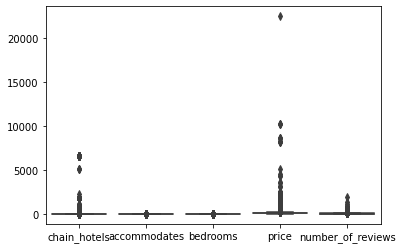

In [ ]:
sns.boxplot(data=lb3[['chain_hotels' , 'accommodates' , 'bedrooms' , 'price' , 'number_of_reviews']])

Looking at the boxplot, we can see that 'chain_hotels' and 'price' has some outliers that diverge a lot from the remaining entries

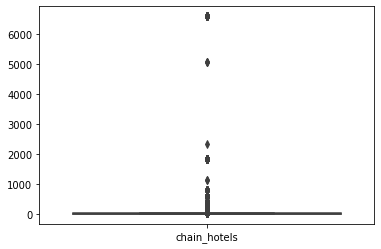

In [ ]:
sns.boxplot(data=lb3[['chain_hotels']])

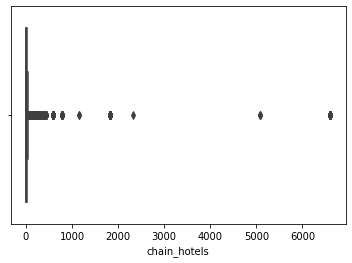

In [ ]:
sns.boxplot(x='chain_hotels', data = lb3)

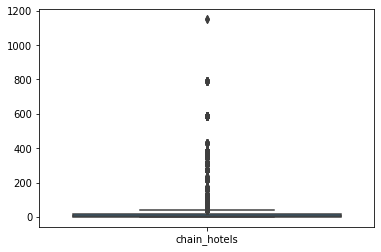

In [ ]:
lb4 =  lb3[lb3['chain_hotels'] < 1300]
sns.boxplot(data=lb4[['chain_hotels']])
#3000

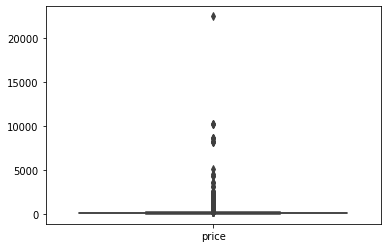

In [ ]:
sns.boxplot(data=lb3[['price']])

<ipython-input-19-572511e7fb95>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lb5 =  lb4[lb3['price'] < 6000]


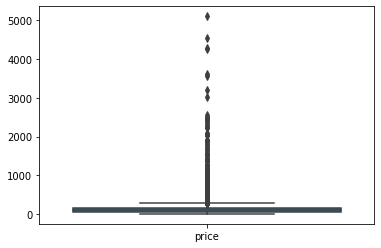

In [ ]:
lb5 =  lb4[lb3['price'] < 6000]
sns.boxplot(data=lb5[['price']])

In [ ]:
lb6 = lb5.reset_index()
lb6.describe()

,index,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19508.000000,19508.000000,19508.000000,17795.000000,18256.000000,19508.000000,19508.000000,18616.000000,19508.000000,19508.000000,17615.000000,17572.000000,17572.000000,17572.000000
mean,9796.290086,9796.290086,9796.290086,95.407699,91.865469,31.748565,3.991183,1.751182,139.667636,54.864107,4.644250,4.694698,4.780696,4.787739
std,5677.359329,5677.359329,5677.359329,14.052638,19.238413,92.421922,2.406550,1.142152,165.351048,82.411969,0.454657,0.399459,0.370458,0.362044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4880.750000,4880.750000,4880.750000,99.000000,95.000000,2.000000,2.000000,1.000000,70.380000,5.000000,4.540000,4.600000,4.750000,4.750000
50%,9773.500000,9773.500000,9773.500000,100.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,4.750000,4.800000,4.890000,4.900000
75%,14703.250000,14703.250000,14703.250000,100.000000,100.000000,18.000000,5.000000,2.000000,155.040000,69.000000,4.900000,4.940000,4.980000,4.990000
max,19650.000000,19650.000000,19650.000000,100.000000,100.000000,1150.000000,26.000000,22.000000,5100.000000,1961.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
lb6.isna().sum()

index                    0
Unnamed: 0               0
id                       0
start_date               0
response_time         1713
response_rate         1713
acceptance_rate       1252
awards                   3
chain_hotels             0
photos                   0
verified                 0
neighbourhood            0
accommodation_type       0
accommodates             0
bedrooms               892
price                    0
number_of_reviews        0
first_review          1893
last_review           1893
rating                1893
clean                 1936
checkin               1936
communication         1936
dtype: int64

In [ ]:
# this one is for the accommodation types that are hotel room and shared room, because all of them can be just one room, so in the case that the number
#of bedrooms are missing it will replace them with 1

for i in lb6.index:
    if lb6.loc[i,'accommodation_type'] in ['Hotel room','Shared room'] and pd.isnull(lb6.loc[i,'bedrooms']):
         lb6.loc[i,'bedrooms'] = 1
lb6 = lb6.fillna(round(lb6.median(numeric_only=True)))
lb6.isna().sum()

index                    0
Unnamed: 0               0
id                       0
start_date               0
response_time         1713
response_rate            0
acceptance_rate          0
awards                   3
chain_hotels             0
photos                   0
verified                 0
neighbourhood            0
accommodation_type       0
accommodates             0
bedrooms                 0
price                    0
number_of_reviews        0
first_review          1893
last_review           1893
rating                   0
clean                    0
checkin                  0
communication            0
dtype: int64

In [ ]:
# this was just an easier way to fill the categorical variables, making python determine mode by itself
lbF = lb6.fillna({'response_time':lb6['response_time'].mode()[0],
                     'awards':lb6['awards'].mode()[0],
                     'first_review':lb6['first_review'].mode()[0],
                     'last_review':lb6['last_review'].mode()[0]})

lbF.isna().sum()

index                 0
Unnamed: 0            0
id                    0
start_date            0
response_time         0
response_rate         0
acceptance_rate       0
awards                0
chain_hotels          0
photos                0
verified              0
neighbourhood         0
accommodation_type    0
accommodates          0
bedrooms              0
price                 0
number_of_reviews     0
first_review          0
last_review           0
rating                0
clean                 0
checkin               0
communication         0
dtype: int64

In [ ]:
# Step 30.2
LisbonDreamsapx = lb6[['response_rate','rating','checkin','clean','communication']]
LisbonDreamsapx

,response_rate,rating,checkin,clean,communication
0,100.0,4.86,4.90,4.76,4.90
1,100.0,5.00,5.00,4.88,5.00
2,100.0,4.78,4.83,4.83,4.83
3,77.0,4.33,4.58,3.92,4.67
4,100.0,4.60,4.50,4.50,4.60
...,...,...,...,...,...
19503,100.0,5.00,5.00,5.00,5.00
19504,100.0,4.86,5.00,4.71,5.00
19505,73.0,3.88,4.14,3.71,4.00
19506,79.0,5.00,5.00,5.00,5.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 30.3
minmax_scaler = MinMaxScaler()
# Step 30.4
scale = minmax_scaler.fit(LisbonDreamsapx)
# Step 30.5
minmax_data = scale.transform(LisbonDreamsapx)
# Step 30.6
minmax_data = pd.DataFrame(minmax_data, columns = LisbonDreamsapx.columns)
minmax_data

,response_rate,rating,checkin,clean,communication
0,1.00,0.972,0.980,0.952,0.9750
1,1.00,1.000,1.000,0.976,1.0000
2,1.00,0.956,0.966,0.966,0.9575
3,0.77,0.866,0.916,0.784,0.9175
4,1.00,0.920,0.900,0.900,0.9000
...,...,...,...,...,...
19503,1.00,1.000,1.000,1.000,1.0000
19504,1.00,0.972,1.000,0.942,1.0000
19505,0.73,0.776,0.828,0.742,0.7500
19506,0.79,1.000,1.000,1.000,1.0000


In [ ]:
lisbonDreamsFD = lbF

lisbonDreamsFD[['response_rate']] = minmax_data[['response_rate']]
lisbonDreamsFD[['rating']] = minmax_data[['rating']]
lisbonDreamsFD[['checkin']] = minmax_data[['checkin']]
lisbonDreamsFD[['clean']] = minmax_data[['clean']]
lisbonDreamsFD[['communication']] = minmax_data[['communication']]

lisbonDreamsFD.describe()

,index,Unnamed: 0,id,response_rate,acceptance_rate,chain_hotels,accommodates,bedrooms,price,number_of_reviews,rating,clean,checkin,communication
count,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000,19508.000000
mean,9796.290086,9796.290086,9796.290086,0.958109,92.387533,31.748565,3.991183,1.716834,139.667636,54.864107,0.935754,0.944999,0.960492,0.952201
std,5677.359329,5677.359329,5677.359329,0.134842,18.717267,92.421922,2.406550,1.126713,165.351048,82.411969,0.088937,0.077991,0.071531,0.087355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4880.750000,4880.750000,4880.750000,0.990000,96.000000,2.000000,2.000000,1.000000,70.380000,5.000000,0.914000,0.926000,0.954000,0.942500
50%,9773.500000,9773.500000,9773.500000,1.000000,100.000000,6.000000,4.000000,1.000000,102.000000,21.000000,0.958000,0.966000,0.982000,0.980000
75%,14703.250000,14703.250000,14703.250000,1.000000,100.000000,18.000000,5.000000,2.000000,155.040000,69.000000,0.990000,1.000000,1.000000,1.000000
max,19650.000000,19650.000000,19650.000000,1.000000,100.000000,1150.000000,26.000000,22.000000,5100.000000,1961.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
lisbonDreamsFD.to_csv('/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/Data/lisbonDreams_preproF.csv')

# **Correlations**

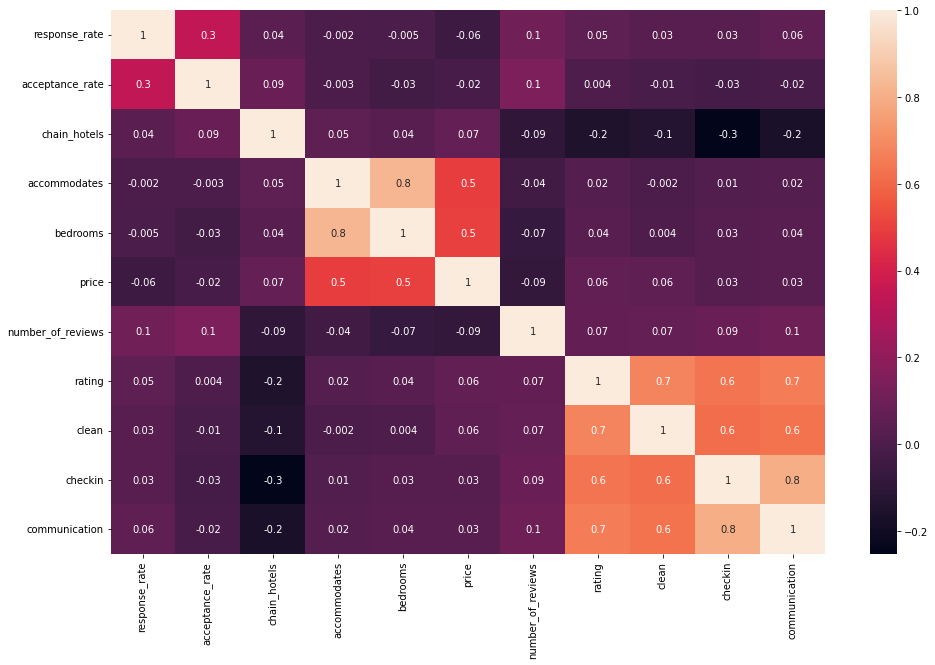

In [ ]:
lisbondreams_corr = lisbonDreamsFD

lisbondreams_corr.drop(['index'], axis = 1, inplace = True)
lisbondreams_corr.drop(['Unnamed: 0'], axis = 1, inplace = True)

corr = lisbondreams_corr.corr()

figure = plt.figure(figsize=(16,10))

sns.heatmap(data = corr, annot=True, fmt = '.1g')

END OF PREPROCESSING

# Clustering

**Clustering:** Refers to the grouping of records, observations on cases into classes of similar objects. This means, from a set of data, organize them in homogenous groups, determining a “structure” of similarities between units.

*Hierarchical Clustering* - Being part of the Connectivity Based Clustering, this algorithm uses a dendrogram to illustrate the arrangement of the clusters produced by the corresponding analyses and in this case, it was used to identify the right number of clusters. The best choice of the number of clusters is the number of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In [ ]:
# We imported the library that we need for the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
lisbonDreamsFD.to_csv(path + r'lisbonDreams_preproF.csv')

##Modelling
(tbd k means)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/'
preproData = pd.read_csv(path + 'lisbonDreams_preproF.csv')

Mounted at /content/drive


In [ ]:
preproData

,Unnamed: 0,index,Unnamed: 0.1,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,...,accommodates,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication
0,0,0,0,2019-07-12,within an hour,1.00,100.0,No,1,Yes,...,6,3.0,96.90,21,2019-08-11,2022-09-03,0.972,0.952,0.980,0.9750
1,1,1,1,2014-10-05,within an hour,1.00,100.0,No,12,Yes,...,2,1.0,25.50,8,2022-05-25,2022-08-31,1.000,0.976,1.000,1.0000
2,2,2,2,2018-03-01,within an hour,1.00,100.0,No,6,Yes,...,6,3.0,66.30,37,2019-04-20,2022-08-18,0.956,0.966,0.966,0.9575
3,3,3,3,2016-06-16,within a few hours,0.77,59.0,No,5,Yes,...,1,1.0,14.28,12,2021-11-26,2022-08-24,0.866,0.784,0.916,0.9175
4,4,4,4,2018-04-22,within an hour,1.00,97.0,No,53,Yes,...,4,2.0,177.48,10,2022-03-27,2022-08-26,0.920,0.900,0.900,0.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19503,19503,19646,19646,2021-11-08,within a day,1.00,0.0,No,1,Yes,...,4,1.0,66.30,0,2019-04-21,2022-08-29,1.000,1.000,1.000,1.0000
19504,19504,19647,19647,2016-04-04,within an hour,1.00,89.0,Yes,6,Yes,...,4,3.0,148.92,14,2019-08-28,2022-09-01,0.972,0.942,1.000,1.0000
19505,19505,19648,19648,2015-08-22,within a day,0.73,15.0,No,58,Yes,...,4,1.0,171.36,8,2016-04-02,2017-11-07,0.776,0.742,0.828,0.7500
19506,19506,19649,19649,2021-11-16,within a few hours,0.79,83.0,Yes,10,Yes,...,6,1.0,183.60,3,2022-04-17,2022-08-16,1.000,1.000,1.000,1.0000


After loading the dataset, we decided to work with the variables that relate to customer satisfaction, and we choose "rating", "clean", "check in" and "communication"

In [ ]:
cust_sat_data = preproData[['rating','clean','checkin','communication']].copy()
cust_sat_data

,rating,clean,checkin,communication
0,0.972,0.952,0.980,0.9750
1,1.000,0.976,1.000,1.0000
2,0.956,0.966,0.966,0.9575
3,0.866,0.784,0.916,0.9175
4,0.920,0.900,0.900,0.9000
...,...,...,...,...
19503,1.000,1.000,1.000,1.0000
19504,0.972,0.942,1.000,1.0000
19505,0.776,0.742,0.828,0.7500
19506,1.000,1.000,1.000,1.0000


To find out how many clusters we should use on the case in study we imported the following library

In [ ]:
from sklearn.cluster import KMeans

To identify the right number of clusters we decided to use two methods, the elbow method and the dendogram method.

At first we tried with K = 6, here we couln't decide if K = 3 or k = 2. Then we tried k = 9 and to see if we would get a clear vision on the right number of clusters. Comparing both graphs we couldn't decide so we did a Dendogram.

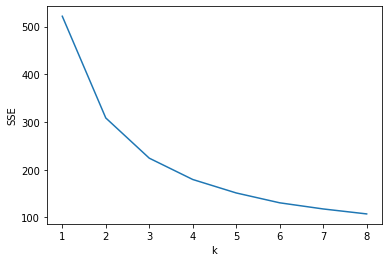

In [ ]:
ks = range(1, 9)
inertias = []

for k in ks:
    # We created a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(cust_sat_data)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

    # Then we plot ks (x-axis) vs inertias (y-axis) using plt.plot() method
plt.plot(ks, inertias)

# We defined the label for x axis as "k"
plt.xlabel('k')
# Then defined the label for y axis as "SSE"
plt.ylabel('SSE')
# Finnaly, we defined the ticks in x axis
plt.xticks(ks)

plt.show()

We then imported the library required to perform the Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

To perform the dendogram we opted to use the ward linkage method due to it being more optimized.

In [ ]:
denclust = linkage(cust_sat_data, 'ward')

In [ ]:
cust_sat_data.reset_index(drop=True)

,rating,clean,checkin,communication
0,0.972,0.952,0.980,0.9750
1,1.000,0.976,1.000,1.0000
2,0.956,0.966,0.966,0.9575
3,0.866,0.784,0.916,0.9175
4,0.920,0.900,0.900,0.9000
...,...,...,...,...
19503,1.000,1.000,1.000,1.0000
19504,0.972,0.942,1.000,1.0000
19505,0.776,0.742,0.828,0.7500
19506,1.000,1.000,1.000,1.0000


We defined the title of the plot, label for x and label for y, followed by the dendogram.

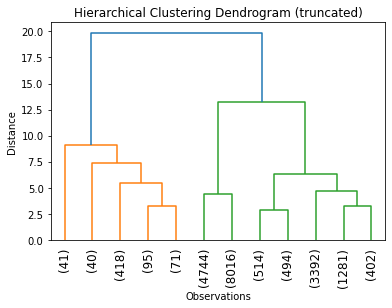

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    denclust,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False
)
plt.show()

!! DOUBLE CHECK !!

So after analyse both graphs, looking to the Dendogram we can see the higher vertical distance from (?) to 14.9, so dranwing two vertical lines we can see 3 vertical lines crossing, so it means that the right number of clusters is 3.

!! DOUBLE CHECK !!

So, after concluding that the right number of clusters is 3, we proceeded to apply the kmeans algorythm.

In [ ]:
model = KMeans(n_clusters=3)
model.fit(cust_sat_data)

KMeans(n_clusters=3)

In this step, we created a new collumn and we named it "cluster_number" so we can see which rows belong to which cluster.
The values vary between 0 and 2 because we have 3 clusters (0; 1; 2).

In [ ]:
cust_sat_data['cluster_number'] = model.labels_
cust_sat_data

,rating,clean,checkin,communication,cluster_number
0,0.972,0.952,0.980,0.9750,0
1,1.000,0.976,1.000,1.0000,0
2,0.956,0.966,0.966,0.9575,0
3,0.866,0.784,0.916,0.9175,2
4,0.920,0.900,0.900,0.9000,2
...,...,...,...,...,...
19503,1.000,1.000,1.000,1.0000,0
19504,0.972,0.942,1.000,1.0000,0
19505,0.776,0.742,0.828,0.7500,2
19506,1.000,1.000,1.000,1.0000,0


Using the describe method, we can check the descriptive statistics for each of the clusters, by describe the "cluster-number" column we just created.

In [ ]:
descr = cust_sat_data.reset_index(drop=True)
descr = descr.groupby(['cluster_number']).describe().transpose()
descr

cluster_number                  0           1            2
rating        count  15906.000000  201.000000  3401.000000
              mean       0.962878    0.514736     0.833784
              std        0.035416    0.181523     0.115124
              min        0.800000    0.200000     0.000000
              25%        0.940000    0.400000     0.800000
              50%        0.968000    0.600000     0.858000
              75%        1.000000    0.600000     0.888000
              max        1.000000    0.900000     1.000000
clean         count  15906.000000  201.000000  3401.000000
              mean       0.967953    0.572090     0.859688
              std        0.035126    0.242441     0.087763
              min        0.800000    0.000000     0.200000
              25%        0.950000    0.400000     0.816000
              50%        0.976000    0.600000     0.874000
              75%        1.000000    0.750000     0.912000
              max        1.000000    1.000000     1.000000
checkin       count  15906.000000  201.000000  3401.000000
              mean       0.980429    0.530587     0.892655
              std        0.025499    0.214153     0.078919
              min        0.600000    0.000000     0.400000
              25%        0.970000    0.400000     0.854000
              50%        0.988000    0.600000     0.910000
              75%        1.000000    0.686000     0.944000
              max        1.000000    1.000000     1.000000
communication count  15906.000000  201.000000  3401.000000
              mean       0.977510    0.410746     0.865834
              std        0.029170    0.252210     0.090936
              min        0.750000    0.000000     0.250000
              25%        0.965000    0.250000     0.827500
              50%        0.987500    0.500000     0.882500
              75%        1.000000    0.587500     0.922500
              max        1.000000    1.000000     1.000000

!! DOUBLE-CHECK !!

After the describe() method we can see the cluster 0 is much more concentrated then cluster, however the STD explain why this could be happening. On the cluster 0 the STD is very small which means that the values are very close to each other and that explains the large amount of data of that cluster.

!! DOUBLE-CHECK !!

To visualize the cluster after the K-means, we did the following commands

First we did a distribution of the plot for the 3 clusters

In [ ]:
cluster0 = cust_sat_data[cust_sat_data.cluster_number==0]
cluster1 = cust_sat_data[cust_sat_data.cluster_number==1]
cluster2 = cust_sat_data[cust_sat_data.cluster_number==2]


First we ploted a graph for the variable "ratings"

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


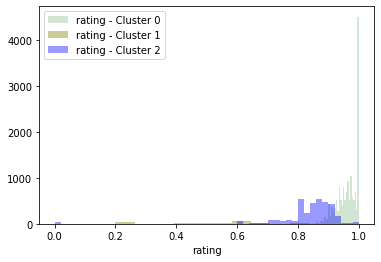

In [ ]:
sns.distplot(cluster0['rating'],color='darkseagreen',label='rating - Cluster 0', kde = False)
sns.distplot(cluster1['rating'],color='olive',label='rating - Cluster 1', kde = False)
sns.distplot(cluster2['rating'],color='blue',label='rating - Cluster 2', kde = False)
plt.legend()

Then we ploted a graph for the variable "clean"

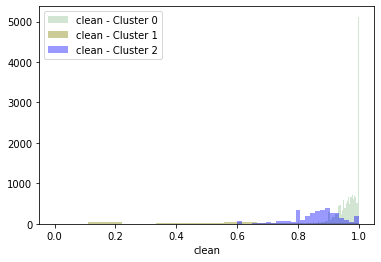

In [ ]:
sns.distplot(cluster0['clean'],color='darkseagreen',label='clean - Cluster 0', kde = False)
sns.distplot(cluster1['clean'],color='olive',label='clean - Cluster 1', kde = False)
sns.distplot(cluster2['clean'],color='blue',label='clean - Cluster 2', kde = False)
plt.legend()

And then, we made a scatter plot for the 3 clusters.

But first we compared the rating and the clean variables

In [ ]:
centroids = model.cluster_centers_
centroids
centroid_0_rating = centroids[0,0]
centroid_1_rating = centroids[1,0]
centroid_2_rating = centroids[2,0]
centroid_0_clean = centroids[0,1]
centroid_1_clean = centroids[1,1]
centroid_2_clean = centroids[2,1]

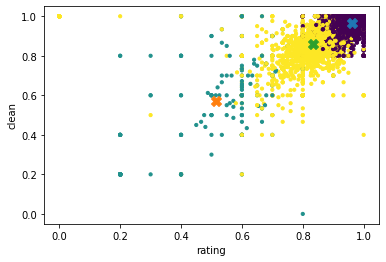

In [ ]:
plt.scatter(cust_sat_data.rating, cust_sat_data.clean, c=cust_sat_data.cluster_number, s=10)
plt.scatter(centroid_0_rating, centroid_0_clean, marker='X', s=100)
plt.scatter(centroid_1_rating, centroid_1_clean, marker='X', s=100)
plt.scatter(centroid_2_rating, centroid_2_clean, marker='X', s=100)
plt.xlabel('rating')
plt.ylabel('clean')
plt.show()

!! DOUBLE-CHECK !!

From the steps above we can conclude that the accomudations on cluster 0 have better ratings because this cluster has the highest mean values for each variable. This is great because its on cluster 0 that we have the most observations.

We can also see that the STD on cluster 0 is extremely low, which means that all the observations have similar values, explaining why cluster 0 is so dense.

From the results that we studied, we believe that accomodations present on cluster 1 should be improved and upgraded because the mean of the "rating" is very low compared to cluster 0 and 2. Regarding cluster 0 and 2, we should focus on promoting the accomodations present in both of these clusters because they're our best accomodations and are more reliable to generate better results in our marketing campaigns.

##SOM Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/'

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
#After we mounted the drive, we need to read the pre-procesed data, and also use the ID of the accomodations as index
df = pd.read_csv(path + 'Data/lisbonDreams_preproF.csv')
df.set_index('id', inplace = True)
df.head()

,Unnamed: 0,index,Unnamed: 0.1,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,...,accommodates,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2019-07-12,within an hour,1.00,100.0,No,1,Yes,...,6,3.0,96.90,21,2019-08-11,2022-09-03,0.972,0.952,0.980,0.9750
1,1,1,1,2014-10-05,within an hour,1.00,100.0,No,12,Yes,...,2,1.0,25.50,8,2022-05-25,2022-08-31,1.000,0.976,1.000,1.0000
2,2,2,2,2018-03-01,within an hour,1.00,100.0,No,6,Yes,...,6,3.0,66.30,37,2019-04-20,2022-08-18,0.956,0.966,0.966,0.9575
3,3,3,3,2016-06-16,within a few hours,0.77,59.0,No,5,Yes,...,1,1.0,14.28,12,2021-11-26,2022-08-24,0.866,0.784,0.916,0.9175
4,4,4,4,2018-04-22,within an hour,1.00,97.0,No,53,Yes,...,4,2.0,177.48,10,2022-03-27,2022-08-26,0.920,0.900,0.900,0.9000


In [ ]:
#In order to know how many days the accommodation has been in the market, wee need to transfor the variable "start_date" to a numerical date,
#also creating a new column with the number of days with this concept. then we have to scale these value so we can analize it with
#the other variables
from datetime import date, datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['D_on_business'] = (pd.Timestamp.now() - df['start_date']).dt.days
df.head()

,Unnamed: 0,index,Unnamed: 0.1,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,...,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication,D_on_business
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2019-07-12,within an hour,1.00,100.0,No,1,Yes,...,3.0,96.90,21,2019-08-11,2022-09-03,0.972,0.952,0.980,0.9750,1264
1,1,1,1,2014-10-05,within an hour,1.00,100.0,No,12,Yes,...,1.0,25.50,8,2022-05-25,2022-08-31,1.000,0.976,1.000,1.0000,3005
2,2,2,2,2018-03-01,within an hour,1.00,100.0,No,6,Yes,...,3.0,66.30,37,2019-04-20,2022-08-18,0.956,0.966,0.966,0.9575,1762
3,3,3,3,2016-06-16,within a few hours,0.77,59.0,No,5,Yes,...,1.0,14.28,12,2021-11-26,2022-08-24,0.866,0.784,0.916,0.9175,2385
4,4,4,4,2018-04-22,within an hour,1.00,97.0,No,53,Yes,...,2.0,177.48,10,2022-03-27,2022-08-26,0.920,0.900,0.900,0.9000,1710


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['acceptance_rate','D_on_business']] = scaler.fit_transform(df[['acceptance_rate','D_on_business']])
df_scal=df
df_scal.head()

,Unnamed: 0,index,Unnamed: 0.1,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,...,bedrooms,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication,D_on_business
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2019-07-12,within an hour,1.00,1.00,No,1,Yes,...,3.0,96.90,21,2019-08-11,2022-09-03,0.972,0.952,0.980,0.9750,0.236761
1,1,1,1,2014-10-05,within an hour,1.00,1.00,No,12,Yes,...,1.0,25.50,8,2022-05-25,2022-08-31,1.000,0.976,1.000,1.0000,0.592721
2,2,2,2,2018-03-01,within an hour,1.00,1.00,No,6,Yes,...,3.0,66.30,37,2019-04-20,2022-08-18,0.956,0.966,0.966,0.9575,0.338581
3,3,3,3,2016-06-16,within a few hours,0.77,0.59,No,5,Yes,...,1.0,14.28,12,2021-11-26,2022-08-24,0.866,0.784,0.916,0.9175,0.465958
4,4,4,4,2018-04-22,within an hour,1.00,0.97,No,53,Yes,...,2.0,177.48,10,2022-03-27,2022-08-26,0.920,0.900,0.900,0.9000,0.327949


In [ ]:
#In this new step, we are selecting the variables that will be useful for the analysis, meaning that this is our perspective,
#all the data is scaled from 0 to 1, which make easier to perform any algorithm
df_persp=df_scal[['response_rate','acceptance_rate','rating','clean','checkin','communication']].copy()
df_persp.head()

,response_rate,acceptance_rate,rating,clean,checkin,communication
id,,,,,,
0,1.00,1.00,0.972,0.952,0.980,0.9750
1,1.00,1.00,1.000,0.976,1.000,1.0000
2,1.00,1.00,0.956,0.966,0.966,0.9575
3,0.77,0.59,0.866,0.784,0.916,0.9175
4,1.00,0.97,0.920,0.900,0.900,0.9000


In [ ]:
#Now we are going to perform the SOM algorithm but fisrt we need to instal it
! pip install git+https://github.com/sevamoo/SOMPY.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-110hfjjx
  Running command git clone -q https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-110hfjjx
  Created wheel for SOMPY: filename=SOMPY-1.1.1-py3-none-any.whl size=29207 sha256=9248cb97dd938662452bb911244d1a47f290a4a6be756df5b8532bec1a340e55
  Stored in directory: /tmp/pip-ephem-wheel-cache-_oeezdb3/wheels/84/18/e5/aa4497893047feae8b0d623c24582657d8f74c4bd3e9d80de5
Successfully built SOMPY


In [ ]:
import sompy
from sompy.sompy import SOMFactory

In [ ]:
#here we are going to create the SOM instance for the variables that we chose
df_som = np.float32(df_persp.values)
df_som

array([[1.    , 1.    , 0.972 , 0.952 , 0.98  , 0.975 ],
       [1.    , 1.    , 1.    , 0.976 , 1.    , 1.    ],
       [1.    , 1.    , 0.956 , 0.966 , 0.966 , 0.9575],
       ...,
       [0.73  , 0.15  , 0.776 , 0.742 , 0.828 , 0.75  ],
       [0.79  , 0.83  , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 0.95  , 0.966 , 0.98  , 0.97  ]], dtype=float32)

In [ ]:
# this step is where we set all the parameters for the SOM

rows = 12
cols = 12
mapsize = [rows, cols]

som = SOMFactory().build(df_som, mapsize, mask=None,
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='bubble', # neighborhood function: 'gaussian' or 'bubble'
                         training='seq') # training mode: 'seq' or 'batch'

In [ ]:
# now we perform the training part

som.train(n_job=1, verbose=False, train_rough_len=5, train_finetune_len=8)

/usr/local/lib/python3.8/dist-packages/sompy/sompy.py:344: RuntimeWarning: invalid value encountered in sqrt
  np.mean(np.sqrt(bmu[1] + fixed_euclidean_x2))) #lbugnon: ojo aca me tiró un warning, revisar (commit sinc: 965666d3d4d93bcf48e8cef6ea2c41a018c1cb83 )


/usr/local/lib/python3.8/dist-packages/sompy/visualization/umatrix.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


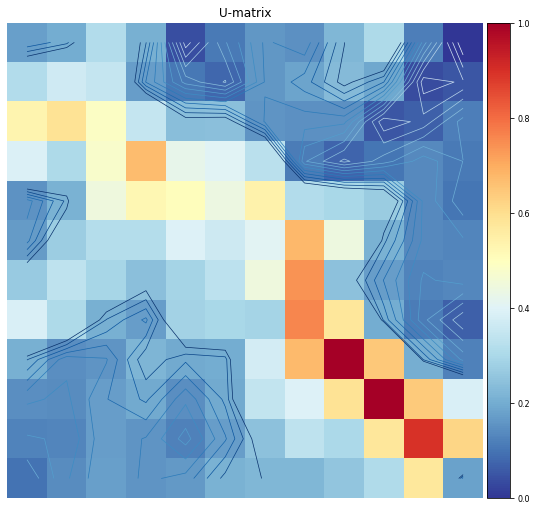

In [ ]:
# in this step we wiil look the results of the SOM

u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

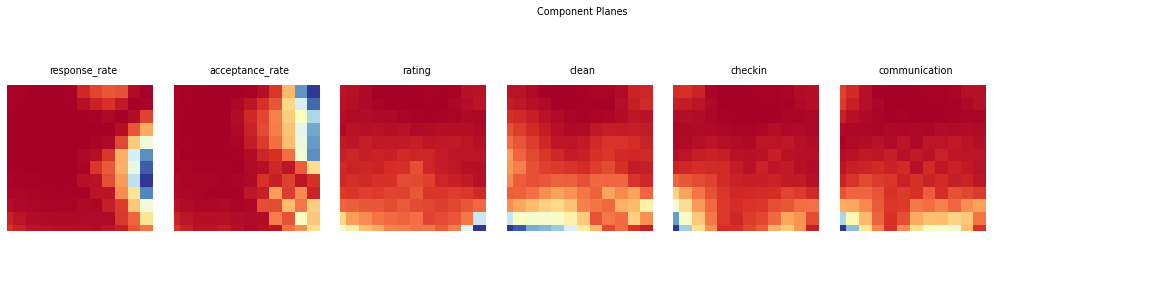

In [ ]:
#after being able to see the results in just one matrix, we will create a heat map for each variable in our perspective

som.component_names = df_persp.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes', text_size=8)
comp_planes.show(som, what='codebook', which_dim='all', col_sz=7.5)

In [ ]:
#after we performed the SOM algorith, we need to cluster the observations, so we can label the data performing the K-means algorithm
bmus = som.project_data(df_som)
bmus

array([ 25,  27,  64, ..., 130,   8,  51])

In [ ]:
som.codebook.matrix

array([[ 2.347110e-01,  3.345610e-01,  2.759670e-01,  4.666060e-01,
        -9.166300e-02, -2.938700e-01],
       [ 2.533760e-01,  3.443540e-01,  3.551910e-01,  4.975810e-01,
        -1.084910e-01, -2.371700e-02],
       [ 2.830100e-01,  3.686530e-01,  4.932510e-01,  5.639850e-01,
         8.165300e-02,  3.008860e-01],
       [ 3.065690e-01,  3.957060e-01,  6.858240e-01,  6.760690e-01,
         4.673880e-01,  5.093460e-01],
       [ 3.032030e-01,  4.022360e-01,  7.094050e-01,  6.959250e-01,
         5.389070e-01,  5.380120e-01],
       [ 2.420240e-01,  3.836940e-01,  7.138050e-01,  6.982260e-01,
         5.467280e-01,  5.407010e-01],
       [-2.489930e-01,  3.474520e-01,  6.507510e-01,  6.567050e-01,
         5.073620e-01,  4.938630e-01],
       [-5.878480e-01,  2.402630e-01,  6.375090e-01,  6.369010e-01,
         4.939760e-01,  4.821480e-01],
       [-7.977780e-01, -1.612630e-01,  6.413480e-01,  6.253570e-01,
         4.925840e-01,  4.826760e-01],
       [-7.254140e-01, -1.238953e+00,

In [ ]:
# we need to define the number of clusters for K-means Algorithm
cl = som.cluster(n_clusters=3)

In [ ]:
labels = getattr(som, 'cluster_labels')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

/usr/local/lib/python3.8/dist-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


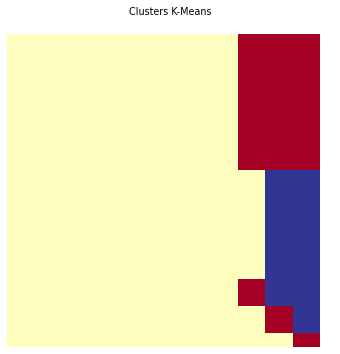

In [ ]:
#now we can get a first visualization of the clustering
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8)
v.show(som, what='cluster')

/usr/local/lib/python3.8/dist-packages/sompy/visualization/hitmap.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


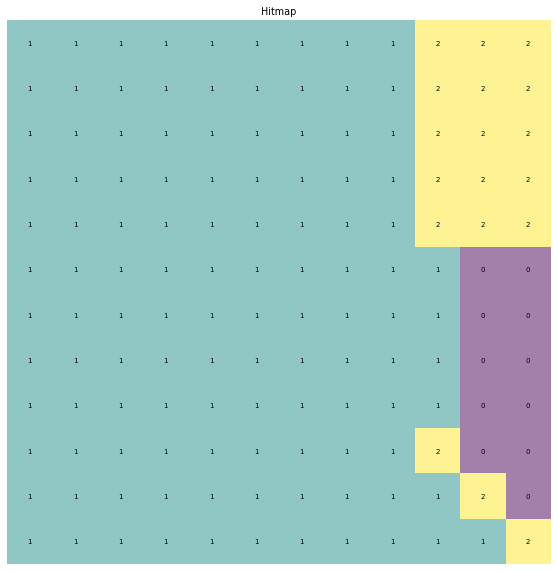

In [ ]:
#we can see a hitmap of the labels
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [ ]:
# in this step we add 2 columns to the data frame,one BMU, which show us the quantity of best matching units that each observation has
# and the second one Cluster, which show us what is the cluster that the observation belongs to.

bmus = som.project_data(df_som)
df_persp['bmu'] = bmus

df_persp['Cluster'] = labels[df_persp['bmu']]
df_persp.head()

,response_rate,acceptance_rate,rating,clean,checkin,communication,bmu,Cluster
id,,,,,,,,
0,1.00,1.00,0.972,0.952,0.980,0.9750,25,1
1,1.00,1.00,1.000,0.976,1.000,1.0000,27,1
2,1.00,1.00,0.956,0.966,0.966,0.9575,64,1
3,0.77,0.59,0.866,0.784,0.916,0.9175,117,2
4,1.00,0.97,0.920,0.900,0.900,0.9000,98,1


In [ ]:
# now we add the labels of the cluster in the original scaled dataset, with the last column Cluster
df_final = df.copy(deep=True)
df_final['cluster'] = df_persp['Cluster']
df_final.head()

,Unnamed: 0,index,Unnamed: 0.1,start_date,response_time,response_rate,acceptance_rate,awards,chain_hotels,photos,...,price,number_of_reviews,first_review,last_review,rating,clean,checkin,communication,D_on_business,cluster
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2019-07-12,within an hour,1.00,1.00,No,1,Yes,...,96.90,21,2019-08-11,2022-09-03,0.972,0.952,0.980,0.9750,0.236761,1
1,1,1,1,2014-10-05,within an hour,1.00,1.00,No,12,Yes,...,25.50,8,2022-05-25,2022-08-31,1.000,0.976,1.000,1.0000,0.592721,1
2,2,2,2,2018-03-01,within an hour,1.00,1.00,No,6,Yes,...,66.30,37,2019-04-20,2022-08-18,0.956,0.966,0.966,0.9575,0.338581,1
3,3,3,3,2016-06-16,within a few hours,0.77,0.59,No,5,Yes,...,14.28,12,2021-11-26,2022-08-24,0.866,0.784,0.916,0.9175,0.465958,2
4,4,4,4,2018-04-22,within an hour,1.00,0.97,No,53,Yes,...,177.48,10,2022-03-27,2022-08-26,0.920,0.900,0.900,0.9000,0.327949,1


In [ ]:
# in this step we got the descriptive statistics that allows us to analize each variable and its clusters. looking at this information help
#us to look for correlations between variables to find proposals

#decide if use the days on business column to perform SOM cause it divides a the biggest cluster, compare results, 3 clusters are better than 2
descr = df_final.reset_index(drop=True)
descr = descr.groupby(['cluster'])[['response_rate','acceptance_rate','rating','clean','checkin','communication','D_on_business']].describe().T
descr

cluster                         0             1            2
response_rate   count  473.000000  17698.000000  1337.000000
                mean     0.262896      0.980872     0.902752
                std      0.254663      0.054625     0.148320
                min      0.000000      0.000000     0.000000
                25%      0.000000      1.000000     0.810000
                50%      0.300000      1.000000     1.000000
                75%      0.500000      1.000000     1.000000
                max      0.800000      1.000000     1.000000
acceptance_rate count  473.000000  17698.000000  1337.000000
                mean     0.665307      0.970533     0.397734
                std      0.373582      0.067229     0.269834
                min      0.000000      0.000000     0.000000
                25%      0.430000      0.980000     0.150000
                50%      0.800000      1.000000     0.480000
                75%      1.000000      1.000000     0.620000
                max      1.000000      1.000000     1.000000
rating          count  473.000000  17698.000000  1337.000000
                mean     0.939243      0.935822     0.933626
                std      0.082124      0.079349     0.172327
                min      0.200000      0.200000     0.000000
                25%      0.902000      0.912000     0.934000
                50%      0.966000      0.956000     0.984000
                75%      1.000000      0.988000     1.000000
                max      1.000000      1.000000     1.000000
clean           count  473.000000  17698.000000  1337.000000
                mean     0.942770      0.943514     0.965445
                std      0.077157      0.079332     0.053786
                min      0.600000      0.000000     0.600000
                25%      0.904000      0.926000     0.950000
                50%      0.980000      0.966000     1.000000
                75%      1.000000      0.994000     1.000000
                max      1.000000      1.000000     1.000000
checkin         count  473.000000  17698.000000  1337.000000
                mean     0.966423      0.958833     0.980349
                std      0.052187      0.073611     0.039083
                min      0.700000      0.000000     0.700000
                25%      0.950000      0.952000     0.976000
                50%      1.000000      0.980000     1.000000
                75%      1.000000      1.000000     1.000000
                max      1.000000      1.000000     1.000000
communication   count  473.000000  17698.000000  1337.000000
                mean     0.946823      0.950694     0.974046
                std      0.080274      0.089318     0.054309
                min      0.500000      0.000000     0.500000
                25%      0.917500      0.940000     0.970000
                50%      0.990000      0.977500     1.000000
                75%      1.000000      1.000000     1.000000
                max      1.000000      1.000000     1.000000
D_on_business   count  473.000000  17698.000000  1337.000000
                mean     0.434594      0.450438     0.469693
                std      0.198959      0.217840     0.207331
                min      0.001840      0.000000     0.000613
                25%      0.308935      0.299734     0.346350
                50%      0.449397      0.468002     0.499080
                75%      0.572480      0.614189     0.620119
                max      0.877326      1.000000     0.919853

SOM's Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def clusters_scores(X, cluster_algorithm, score_function):
    range_n_clusters = [2, 3]
    scores =[]

    for n_clusters in range_n_clusters:
        clusterer = cluster_algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        score_avg = score_function(X, cluster_labels)
        scores.append(score_avg)

        print("For n_clusters =", n_clusters, "The average", score_function.__name__, "is :", score_avg)
    return scores

In [ ]:
from sklearn.cluster import KMeans
silhouette = clusters_scores(df_persp, KMeans, silhouette_score)

For n_clusters = 2 The average silhouette_score is : 0.6244227328054301
For n_clusters = 3 The average silhouette_score is : 0.592194393881508


In [ ]:
def draw_scores(scores):
    plt.figure(figsize=(3, 3))
    plt.plot(range(2,4), scores,c="#008fd5",label="Silhouette Coefficient")

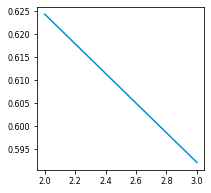

In [ ]:
draw_scores(silhouette)

End of SOM

##DBSCAN

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/'
df = pd.read_csv(path + 'lisbonDreams_preproF.csv')

Mounted at /content/drive


In [ ]:
# First we set "id" as Index
df.set_index(keys = df['id'], inplace = True)


KeyError: ignored

In [ ]:
# Then we selected the variables that we are going to use taking in account the project prespective.
df_prod = df[['rating','clean','checkin','communication']].copy()
df_prod.isnull().sum()

In [ ]:
df_prod.head()

In [ ]:
# To do the DBSCAN we need to import the need libraries
# We are not doing mimax scaler because our data is already scaled between 0 and 1
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler



In [ ]:
# To start we defined de eps = 0.15 and min_samples = 5.
# After trying different values we saw that the number of clusters would increase to much and each cluster would have a very small count and the cluster 0 kep the same count number.
# This happens because the data is so concentrated in one place.

dbclust = DBSCAN(eps = 0.15, min_samples = 5).fit(df_prod)

In [ ]:
dbclust.labels_

In [ ]:
# then we used the describe method to analyse our data
len(set(dbclust.labels_))
df_prod_res = df_prod.copy()
df_prod_res['label_db'] = dbclust.labels_
descr_bk = df_prod_res.reset_index(drop=True)
descr_bk = descr_bk.groupby(['label_db']).describe().transpose()
descr_bk

In [ ]:
# Created the visualization for the varaibles rating and cleaning
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), squeeze=False)
axs[0,0].scatter(df_prod_res.checkin, df_prod_res.communication, c = df_prod_res.label_db)
axs[0,0].set_title('Clustering Using DBSCAN')
axs[0,0].set_xlabel('rating')
axs[0,0].set_ylabel('clean')
plt.show()

In [ ]:
# Created the visualizations comparing each variable

sns.pairplot(df_prod_res, hue='label_db', vars = df_prod_res.columns[:-1], kind='scatter', diag_kind='hist')

##BIRCH - Rodrigo

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DMDM/Final Project/'
df = pd.read_csv(path + 'lisbonDreams_preproF.csv')

In [ ]:
df.head()

In [ ]:
df_birch = df[['rating','clean','checkin','communication']].copy()
df_birch.isnull().sum()

In [ ]:
df_birch.head()

In [ ]:
# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch


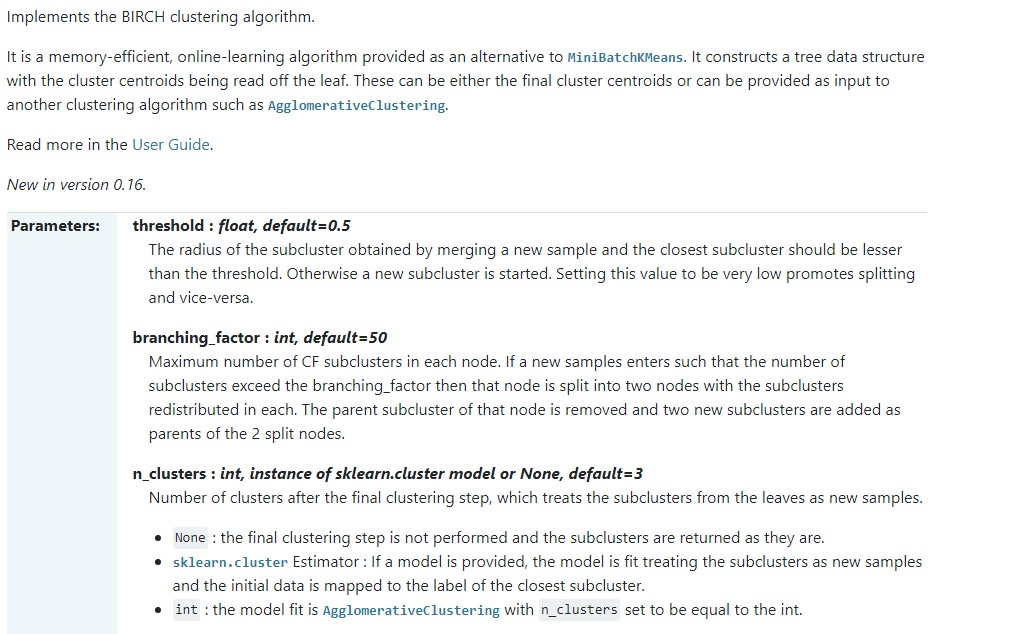

In [ ]:
# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = 3, threshold = 0.05)

# Fit the data
model.fit(df_birch)

# Predict the same data
pred = model.predict(df_birch)

# Creating a scatter plot
plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], c = pred)
plt.show()

## OPTICS - Rodrigo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler


In [ ]:
df_opt = df[['rating','clean','checkin','communication']].copy()
df_opt.isnull().sum()
df_opt.head()

In [ ]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_opt_scaled = scaler.fit_transform(df_opt)

# Normalizing the data so that the data
# approximately follows a Gaussian distribution
df_opt_normalized = normalize(df_opt_scaled)

# Converting the numpy array into a pandas DataFrame
df_opt_normalized = pd.DataFrame(df_opt_normalized)

# Renaming the columns
df_opt_normalized.columns = df_opt.columns

df_opt_normalized.head()


In [ ]:
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)

# Training the model
optics_model.fit(df_opt_normalized)


In [ ]:
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
								core_distances = optics_model.core_distances_,
								ordering = optics_model.ordering_, eps = 0.05)

# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
								core_distances = optics_model.core_distances_,
								ordering = optics_model.ordering_, eps = 0.05)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(df_opt_normalized))

# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]

print(labels)


In [ ]:
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = df_opt_normalized[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)

ax2.plot(df_opt_normalized.iloc[optics_model.labels_ == -1, 0],
		df_opt_normalized.iloc[optics_model.labels_ == -1, 1],
	'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')

# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = df_opt_normalized[labels1 == Class]
	ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')

ax3.plot(df_opt_normalized.iloc[labels1 == -1, 0],
		df_opt_normalized.iloc[labels1 == -1, 1],
	'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')

# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
	Xk = df_opt_normalized.iloc[labels2 == Class]
	ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)

ax4.plot(df_opt_normalized.iloc[labels2 == -1, 0],
		df_opt_normalized.iloc[labels2 == -1, 1],
	'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()
